In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

In [16]:
#import the countries data from the csv file with an index column of countries
df_even = pd.read_csv("March18_Evening_data.csv")
df_even.info()

#create columns for counts
counts_1_3 = df_even['Chan_0_1']
counts_2_3 = df_even['Chan_0_2']
counts_1_2 = df_even['Chan_1_2']

timestamps = df_even['timestamp'].values
print(type(timestamps))
print(df_even)
df_even.dropna(inplace=True)
df_even.info()
#reset index
df_even.reset_index(drop=True, inplace=True)
df_even.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Chan_0_1      226 non-null    int64  
 1   Chan_0_2      226 non-null    int64  
 2   Chan_1_2      226 non-null    int64  
 3   timestamp     226 non-null    object 
 4   Latitude      170 non-null    float64
 5   Longitude     170 non-null    float64
 6   Altitude (m)  170 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 12.5+ KB
<class 'numpy.ndarray'>
     Chan_0_1  Chan_0_2  Chan_1_2                  timestamp  Latitude  \
0          19        10        16   Sat Mar 18 19:00:32 2023       NaN   
1          16        12        21   Sat Mar 18 19:01:32 2023       NaN   
2          12        10        17   Sat Mar 18 19:02:32 2023       NaN   
3          16        14        21   Sat Mar 18 19:03:32 2023       NaN   
4          17         9        22   Sat Mar 18 19:04

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m)
0,21,17,24,Sat Mar 18 19:44:32 2023,33.755906,-84.387874,346.900284
1,18,20,28,Sat Mar 18 19:45:32 2023,33.751984,-84.378474,304.837447
2,19,22,29,Sat Mar 18 19:46:32 2023,33.751303,-84.379240,305.408028
3,19,13,26,Sat Mar 18 19:47:32 2023,33.750129,-84.379599,312.089753
4,20,13,33,Sat Mar 18 19:48:32 2023,33.749779,-84.379577,313.158915


In [17]:
# # define the initial point (in this case, New York City)
# lat1 = radians(df_even['Latitude'].values[0])
# lon1 = radians(df_even['Longitude'].values[0])

# # define a function to calculate the distance between two points
# def calculate_distance(lat2, lon2):
#     R = 6373.0  # radius of the Earth in kilometers

#     lat1_rad = radians(lat1)
#     lon1_rad = radians(lon1)
#     lat2_rad = radians(lat2)
#     lon2_rad = radians(lon2)

#     dlon = lon2_rad - lon1_rad
#     dlat = lat2_rad - lat1_rad

#     a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     distance = c
#     print(c)

#     #distance = R * c
#     #print(distance)
#     return distance

# # apply the function to each row in the DataFrame and save the result in a new column
# df_even['distance'] = df_even.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude']), axis=1)

In [18]:
distance = 0.0
for index, row in df_even.iterrows():
    if index == 0:
        df_even.at[index, "distance"] = 0.0
    else:
        R = 3958.8  # radius of the Earth in miles
        lat1 = df_even.at[0, "Latitude"]
        lon1 = df_even.at[0, "Longitude"]
        lat2 = df_even.at[index, "Latitude"]
        lon2 = df_even.at[index, "Longitude"]
        lat1_rad = radians(lat1)
        lon1_rad = radians(lon1)
        lat2_rad = radians(lat2)
        lon2_rad = radians(lon2)
        dlon = lon2_rad - lon1_rad
        dlat = lat2_rad - lat1_rad
        a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        dist = R * c
        distance += dist        
        print(distance)
        df_even.at[index, "distance"] = dist

0.6041819968008127
1.1933889724917983
1.8141233840608304
2.451622965088499
3.226990037219477
4.170864897764519
5.458733681414634
6.885193890690236
8.646939880186356
10.548528494025424
12.500112450420987
14.347467589500186
16.221648575143245
18.096594123562443
19.98114734736323
21.93676602113292
23.868714739967672
25.699987578410028
27.528006723761756
29.356681603506836
30.86608231812739
32.188823208564834
33.459549216769275
34.527463301739566
35.44593115760731
36.35202937663294
37.3870223938409
38.69009143700434
40.10397544134638
41.63867826678701
43.17289640445556
44.84861477113298
46.88758366208773
48.94741643550849
51.28082134899638
53.79689290770459
56.656418606386175
59.739224645270255
63.2818442380533
67.28027864449915
71.60030502344273
76.38015571348069
81.41109294473439
86.87363628833643
92.81452183389052
99.14208084049811
105.65182194564201
112.28692718361758
118.92578516060739
125.68044122284655
132.56159970926524
139.7126102186703
147.229997735724
155.0561316838228
162.88471

In [19]:
print(df_even['distance'])

0      0.000000
1      0.604182
2      0.589207
3      0.620734
4      0.637500
         ...   
165    0.855650
166    0.671300
167    0.583916
168    0.605486
169    0.605857
Name: distance, Length: 170, dtype: float64


In [20]:
df_even['timestamp'] = pd.to_datetime(df_even['timestamp'])
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m),distance
0,21,17,24,2023-03-18 19:44:32,33.755906,-84.387874,346.900284,0.000000
1,18,20,28,2023-03-18 19:45:32,33.751984,-84.378474,304.837447,0.604182
2,19,22,29,2023-03-18 19:46:32,33.751303,-84.379240,305.408028,0.589207
3,19,13,26,2023-03-18 19:47:32,33.750129,-84.379599,312.089753,0.620734
4,20,13,33,2023-03-18 19:48:32,33.749779,-84.379577,313.158915,0.637500


In [21]:
df_even.sort_values(by='timestamp', ascending=True, inplace=True)
df_even.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp,Latitude,Longitude,Altitude (m),distance
0,21,17,24,2023-03-18 19:44:32,33.755906,-84.387874,346.900284,0.000000
1,18,20,28,2023-03-18 19:45:32,33.751984,-84.378474,304.837447,0.604182
2,19,22,29,2023-03-18 19:46:32,33.751303,-84.379240,305.408028,0.589207
3,19,13,26,2023-03-18 19:47:32,33.750129,-84.379599,312.089753,0.620734
4,20,13,33,2023-03-18 19:48:32,33.749779,-84.379577,313.158915,0.637500


In [22]:
df_even_counts = df_even[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2', 'distance']]
df_even_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2', 'distance'], dtype='object')

In [23]:
df_even_counts = df_even_counts.resample('T', on = 'timestamp', axis=0).mean()
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,distance
timestamp,,,,
2023-03-18 19:44:00,21.0,17.0,24.0,0.000000
2023-03-18 19:45:00,18.0,20.0,28.0,0.604182
2023-03-18 19:46:00,19.0,22.0,29.0,0.589207
2023-03-18 19:47:00,19.0,13.0,26.0,0.620734
2023-03-18 19:48:00,20.0,13.0,33.0,0.637500


In [24]:
df_even_counts['average'] = df_even_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_even_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,distance,average
timestamp,,,,,
2023-03-18 19:44:00,21.0,17.0,24.0,0.000000,20.666667
2023-03-18 19:45:00,18.0,20.0,28.0,0.604182,22.000000
2023-03-18 19:46:00,19.0,22.0,29.0,0.589207,23.333333
2023-03-18 19:47:00,19.0,13.0,26.0,0.620734,19.333333
2023-03-18 19:48:00,20.0,13.0,33.0,0.637500,22.000000


Text(0, 0.5, 'Counts')

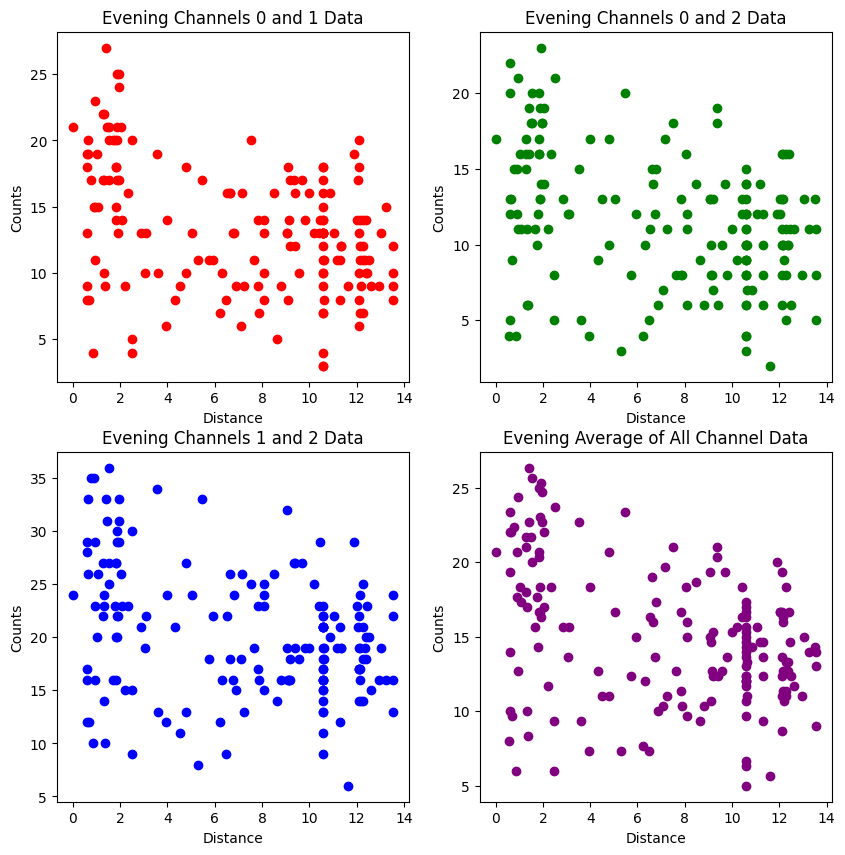

In [25]:
figure, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].scatter(df_even_counts['distance'], df_even_counts['Chan_0_1'], color='red')
ax[0,0].set_title('Evening Channels 0 and 1 Data')
ax[0,0].set_xlabel('Distance')
ax[0,0].set_ylabel('Counts')
ax[0, 1].scatter(df_even_counts['distance'], df_even_counts['Chan_0_2'], color='green')
ax[0,1].set_title('Evening Channels 0 and 2 Data')
ax[0,1].set_xlabel('Distance')
ax[0,1].set_ylabel('Counts')
ax[1, 0].scatter(df_even_counts['distance'], df_even_counts['Chan_1_2'], color='blue')
ax[1,0].set_title('Evening Channels 1 and 2 Data')
ax[1,0].set_xlabel('Distance')
ax[1,0].set_ylabel('Counts')
ax[1, 1].scatter(df_even_counts['distance'], df_even_counts['average'], color='purple')
ax[1,1].set_title('Evening Average of All Channel Data')
ax[1,1].set_xlabel('Distance')
ax[1,1].set_ylabel('Counts')


